In [1]:
from gensim.models import KeyedVectors
from gensim.corpora import Dictionary

In [2]:
word_vectors = KeyedVectors.load_word2vec_format('/home/yaroslav/Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=10000)

In [13]:
import json
json.dump(list(word_vectors.vocab.keys()), open('./google_10k_vocab.json', 'w'))

In [5]:
from sklearn.manifold import TSNE

In [6]:
%%time
X_embedded = TSNE(n_components=2).fit_transform(word_vectors.vectors)

CPU times: user 10min 8s, sys: 10.7 s, total: 10min 19s
Wall time: 10min 19s


In [35]:
json.dump({
    'x': list(map(float, X_embedded.T[0])),
    'y': list(map(float, X_embedded.T[1])),
}, open('./google_10k_embed_2d.json', 'w'))

In [17]:
%%time
embed_3d = TSNE(n_components=3).fit_transform(word_vectors.vectors)

CPU times: user 1h 21min 17s, sys: 37.1 s, total: 1h 21min 54s
Wall time: 1h 22min 59s


In [34]:
json.dump({
    'x': list(map(float, embed_3d.T[0])),
    'y': list(map(float, embed_3d.T[1])),
    'z': list(map(float, embed_3d.T[2])),
}, open('./google_10k_embed_3d.json', 'w'))

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

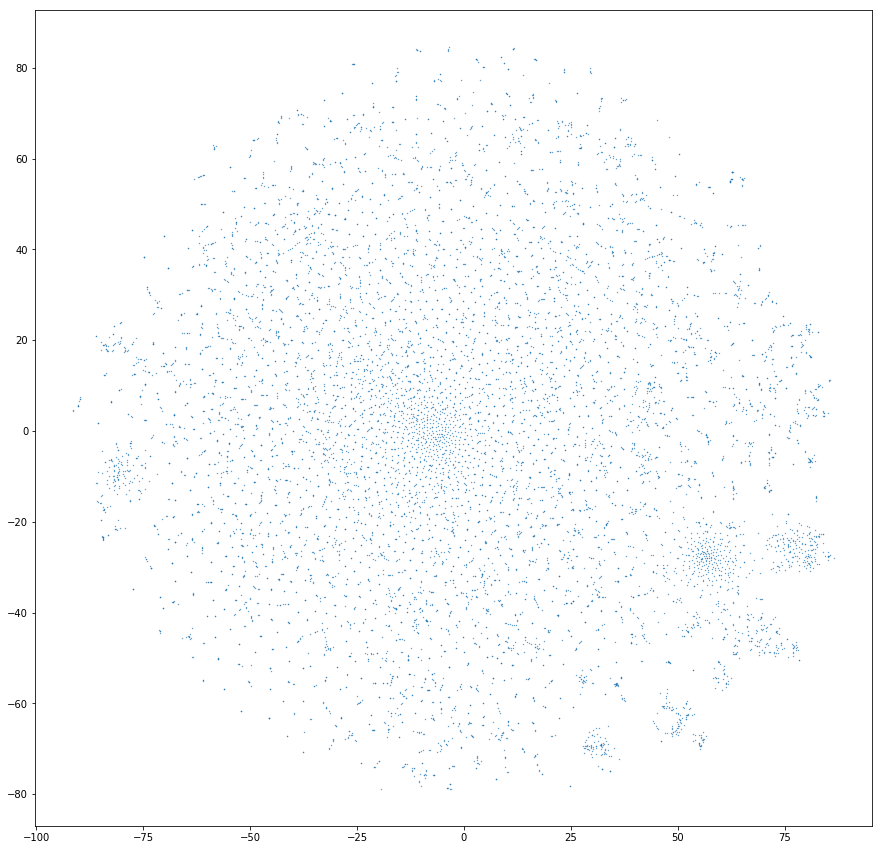

In [16]:
plt.figure(figsize=(15, 15))
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.scatter(X_embedded.T[0], X_embedded.T[1], s=0.1)